In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

demo = pd.read_csv('zip_code_demographics.csv')

crime = pd.read_csv('crime_2017_with_zip.csv')

parking = pd.read_csv('violation2017.csv')

zipcode_geo_code = pd.read_csv('chicago_zip_geo.csv')

crime.head()




C:\Users\jonat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Primary Type,Description,Year,Latitude,Longitude,Location,zip_code,dist_to_zip
0,477655,THEFT,OVER $500,2017,41.644608,-87.613055,"(41.644607723, -87.613055128)",60633,2.973148
1,439646,THEFT,OVER $500,2017,41.645288,-87.540012,"(41.645287658, -87.540012254)",60633,1.691370
2,468989,ROBBERY,ARMED: HANDGUN,2017,41.645288,-87.540012,"(41.645287658, -87.540012254)",60633,1.691370
3,449764,OTHER OFFENSE,VEHICLE TITLE/REG OFFENSE,2017,41.645647,-87.540041,"(41.645647364, -87.54004077)",60633,1.671695
4,493155,THEFT,OVER $500,2017,41.647039,-87.614404,"(41.64703943, -87.614403759)",60633,2.966054


In [2]:
df_zip_crime = crime.groupby(['zip_code','Primary Type']).count().unstack().fillna(0)
df_zip_crime = df_zip_crime['Year']
#df_zip_crime.columns = df_zip_crime.columns.droplevel()
df_zip_crime['Total Crimes'] = df_zip_crime.sum(axis = 1)



In [3]:

#demo.index.names = ['zip_code']

demo.rename(columns={'zip code': 'zip_code'}, inplace = True)
demo['Property Tax % on Houses'] = demo['Property Tax % on Houses'].apply(lambda x: np.float(x))

zip_demo_crime = pd.merge(demo, df_zip_crime, on = 'zip_code')
zip_demo_crime.to_csv('merged.csv')

for x in zip_demo_crime.zip_code:
    print(x)

y = list(zip_demo_crime.zip_code)


60601
60602
60603
60604
60605
60606
60607
60608
60609
60610
60611
60612
60613
60614
60615
60616
60617
60618
60619
60620
60621
60622
60623
60624
60625
60626
60628
60629
60630
60631
60632
60633
60634
60636
60637
60638
60639
60640
60641
60643
60644
60645
60646
60647
60649
60651
60652
60653
60654
60655
60656
60657
60659
60660
60661
60642


In [4]:
import numpy as np
def f(zipcode):
    return zipcode in y
        
    


    
parking['# of Tickets'] = 1
df_parking_zip= parking.groupby(['zipcode']).sum()[['# of Tickets', 'fine_level1_amount', 'fine_level2_amount']]
pd.pivot_table(df_parking_zip, index = 'zipcode', margins=True)

df_parking_zip = df_parking_zip.reset_index()
df_parking_zip['ValidZip'] = df_parking_zip['zipcode'].apply(f)
#df_parking_zip.apply(f)
df_parking_zip = df_parking_zip[df_parking_zip['ValidZip']==True]
df_parking_zip.to_csv('parking_zip.csv')
df_parking_zip.rename(columns={'zipcode': 'zip_code'}, inplace = True)


df_parking_zip['zip_code'] = df_parking_zip['zip_code'].apply(lambda x: np.float(x+0))
allzip = pd.merge(df_parking_zip, zip_demo_crime, on = 'zip_code')

allzip

,zip_code,# of Tickets,fine_level1_amount,fine_level2_amount,ValidZip,Estimated zip code population in 2016,Zip code population in 2010,Zip code population in 2000,March 2016 Index,Land area,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,Total Crimes
0,60601.0,322,29705,59410,True,13891,11110,5591.0,108.9,0.4 sq. mi.,...,14.0,16.0,0.0,5.0,18.0,1.0,0.0,303.0,0.0,611.0
1,60602.0,52,4580,9160,True,1269,1204,70.0,110.1,0.1 sq. mi.,...,16.0,4.0,0.0,1.0,21.0,2.0,0.0,559.0,0.0,916.0
2,60603.0,28,3050,6100,True,1043,493,378.0,110.4,0.1 sq. mi.,...,6.0,0.0,0.0,0.0,12.0,1.0,1.0,216.0,0.0,348.0
3,60604.0,45,3975,7950,True,627,570,78.0,106.7,0.1 sq. mi.,...,18.0,1.0,0.0,3.0,33.0,3.0,0.0,271.0,1.0,607.0
4,60605.0,503,45540,91080,True,27004,24668,12423.0,107.3,1.2 sq. mi.,...,20.0,0.0,0.0,1.0,16.0,1.0,1.0,152.0,5.0,393.0
5,60606.0,95,8590,17180,True,3054,2308,1682.0,107.5,0.3 sq. mi.,...,7.0,0.0,0.0,3.0,8.0,0.0,0.0,124.0,0.0,277.0
6,60607.0,906,85860,171720,True,28784,23897,15552.0,106.9,2.3 sq. mi.,...,45.0,0.0,0.0,1.0,38.0,3.0,3.0,371.0,2.0,956.0
7,60608.0,2989,297450,594900,True,79191,82739,92472.0,106.0,6.4 sq. mi.,...,85.0,0.0,0.0,6.0,44.0,8.0,1.0,249.0,23.0,1101.0
8,60609.0,2751,295275,590550,True,63142,64906,79469.0,104.0,7.8 sq. mi.,...,126.0,0.0,0.0,9.0,47.0,4.0,1.0,243.0,32.0,1384.0
9,60610.0,1097,101690,203380,True,38989,37726,47513.0,108.0,1.2 sq. mi.,...,33.0,0.0,0.0,4.0,37.0,2.0,1.0,342.0,3.0,820.0


In [5]:
zipcode_geo_code.columns = ['zip_code', 'Lat', 'Lon']
#zipcode_geo_code
zipcode_geo_code['Zip In Demo'] = zipcode_geo_code['zip_code'].apply(f)



In [6]:
type(allzip['Property Tax % on Houses'][0])
allzip['Tickets per 1% tax'] = allzip['# of Tickets']/(allzip['Property Tax % on Houses']*1000)
allzip['Tickets per 1000$ tax'] = allzip['# of Tickets']/(allzip['Property Tax on Housting ($)']/1000)
allzip['Tickets per 1000 people'] = allzip['# of Tickets']/(allzip['Estimated zip code population in 2016']/1000)
allzip['Crimes per 1000 people'] = allzip['Total Crimes']/(allzip['Estimated zip code population in 2016']/1000)
allzip['zip_code'] = allzip['zip_code'].apply(lambda x: np.str(x))
allzip
#allzip.to_csv('totaldata.csv')

,zip_code,# of Tickets,fine_level1_amount,fine_level2_amount,ValidZip,Estimated zip code population in 2016,Zip code population in 2010,Zip code population in 2000,March 2016 Index,Land area,...,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,Total Crimes,Tickets per 1% tax,Tickets per 1000$ tax,Tickets per 1000 people,Crimes per 1000 people
0,60601.0,322,29705,59410,True,13891,11110,5591.0,108.9,0.4 sq. mi.,...,18.0,1.0,0.0,303.0,0.0,611.0,26.833333,50.304640,23.180477,43.985314
1,60602.0,52,4580,9160,True,1269,1204,70.0,110.1,0.1 sq. mi.,...,21.0,2.0,0.0,559.0,0.0,916.0,3.250000,8.039579,40.977147,721.828211
2,60603.0,28,3050,6100,True,1043,493,378.0,110.4,0.1 sq. mi.,...,12.0,1.0,1.0,216.0,0.0,348.0,2.333333,3.369029,26.845638,333.652924
3,60604.0,45,3975,7950,True,627,570,78.0,106.7,0.1 sq. mi.,...,33.0,3.0,0.0,271.0,1.0,607.0,3.461538,6.760817,71.770335,968.102073
4,60605.0,503,45540,91080,True,27004,24668,12423.0,107.3,1.2 sq. mi.,...,16.0,1.0,1.0,152.0,5.0,393.0,38.692308,92.838686,18.626870,14.553399
5,60606.0,95,8590,17180,True,3054,2308,1682.0,107.5,0.3 sq. mi.,...,8.0,0.0,0.0,124.0,0.0,277.0,7.307692,16.943107,31.106745,90.700720
6,60607.0,906,85860,171720,True,28784,23897,15552.0,106.9,2.3 sq. mi.,...,38.0,3.0,3.0,371.0,2.0,956.0,64.714286,168.935297,31.475820,33.212896
7,60608.0,2989,297450,594900,True,79191,82739,92472.0,106.0,6.4 sq. mi.,...,44.0,8.0,1.0,249.0,23.0,1101.0,213.500000,842.683958,37.744188,13.903095
8,60609.0,2751,295275,590550,True,63142,64906,79469.0,104.0,7.8 sq. mi.,...,47.0,4.0,1.0,243.0,32.0,1384.0,183.400000,1038.505096,43.568465,21.918850
9,60610.0,1097,101690,203380,True,38989,37726,47513.0,108.0,1.2 sq. mi.,...,37.0,2.0,1.0,342.0,3.0,820.0,78.357143,166.136605,28.136141,21.031573


In [7]:
taxtick = allzip[['zip_code','Property Tax % on Houses','# of Tickets', 'Tickets per 1000 people', 'Crimes per 1000 people',
                  'Estimated zip code population in 2016', 'Total Crimes', 'Property Tax on Housting ($)']]




[Text(1,0,'-200'),
 Text(1,0,'0'),
 Text(1,0,'200'),
 Text(1,0,'400'),
 Text(1,0,'600'),
 Text(1,0,'800'),
 Text(1,0,'1,000'),
 Text(1,0,'1,200')]

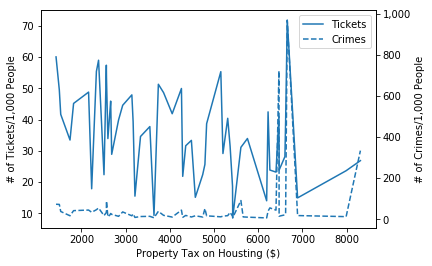

In [8]:



#from matplotlib.pyplot import *
taxtick3 = taxtick.groupby('Property Tax on Housting ($)').sum()
taxtick3['Tickets per 1000 people'] = taxtick3['# of Tickets']/(taxtick3['Estimated zip code population in 2016']/1000)
taxtick3['Crimes per 1000 people'] = taxtick3['Total Crimes']/(taxtick3['Estimated zip code population in 2016']/1000)
taxtick3

a = taxtick3['Tickets per 1000 people'].plot(label = 'Tickets')
plt.ylabel('# of Tickets/1,000 People')

b = taxtick3['Crimes per 1000 people'].plot(linestyle = '--', ax=plt.twinx(), label = 'Crimes' )
plt.ylabel('# of Crimes/1,000 People'), plt.legend()

lines, labels = a.get_legend_handles_labels()
lines2, labels2 = b.get_legend_handles_labels()
b.legend(lines + lines2, labels + labels2, loc=0)

#b.set_xticklabels(['{:,.1%}'.format(x) for x in b.get_xticks()])
b.set_yticklabels(['{:,.0f}'.format(x) for x in b.get_yticks()])

[Text(1,0,'10'),
 Text(1,0,'15'),
 Text(1,0,'20'),
 Text(1,0,'25'),
 Text(1,0,'30'),
 Text(1,0,'35'),
 Text(1,0,'40'),
 Text(1,0,'45'),
 Text(1,0,'50')]

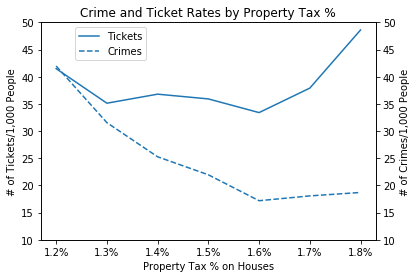

In [9]:


taxtick2 = taxtick.groupby(['Property Tax % on Houses']).sum()
taxtick2['Tickets per 1000 people'] = taxtick2['# of Tickets']/(taxtick2['Estimated zip code population in 2016']/1000)
taxtick2['Crimes per 1000 people'] = taxtick2['Total Crimes']/(taxtick2['Estimated zip code population in 2016']/1000)
taxtick2

a = taxtick2['Tickets per 1000 people'].plot(label = 'Tickets', title = "Crime and Ticket Rates by Property Tax %")
plt.ylabel('# of Tickets/1,000 People'), plt.ylim(bottom = 10, top = 50), 

b = taxtick2['Crimes per 1000 people'].plot(linestyle = '--', ax=plt.twinx(), label = 'Crimes' )
plt.ylabel('# of Crimes/1,000 People'), plt.ylim(bottom = 10, top = 50)

lines, labels = a.get_legend_handles_labels()
lines2, labels2 = b.get_legend_handles_labels()
b.legend(lines + lines2, labels + labels2, bbox_to_anchor=(.33, 1))

b.set_xticklabels(['{:,.1%}'.format(x) for x in b.get_xticks()])
b.set_yticklabels(['{:,.0f}'.format(x) for x in b.get_yticks()])

[Text(0,0,'0'),
 Text(0,0,'100,000'),
 Text(0,0,'200,000'),
 Text(0,0,'300,000'),
 Text(0,0,'400,000'),
 Text(0,0,'500,000'),
 Text(0,0,'600,000'),
 Text(0,0,'700,000'),
 Text(0,0,'800,000')]

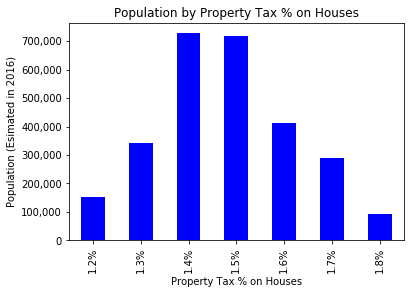

In [10]:


b = taxtick2['Estimated zip code population in 2016'].plot(kind = 'bar', linestyle = '--', label = 'Crimes' , color = 'blue')
plt.ylabel('Population (Esimated in 2016)'), plt.title("Population by Property Tax % on Houses")
lines, labels = a.get_legend_handles_labels()


b.set_xticklabels([x for x in [1.2,1.3, 1.4, 1.5, 1.6, 1.7, 1.8]], rotation = 90)
b.set_xticklabels(['{:,.1%}'.format(x/100) for x in [1.2,1.3, 1.4, 1.5, 1.6, 1.7, 1.8]], rotation = 90)
b.set_yticklabels(['{:,.0f}'.format(x) for x in b.get_yticks()])




[Text(0,0,'0-1,000'),
 Text(0,0,'1,000 - 2,000'),
 Text(0,0,'2,000 - 3,000'),
 Text(0,0,'3,000 - 4000'),
 Text(0,0,'4,000 - 5,000'),
 Text(0,0,'5,000 - 6,000'),
 Text(0,0,'6,000 - 7,000'),
 Text(0,0,'7,000 - 8,000')]

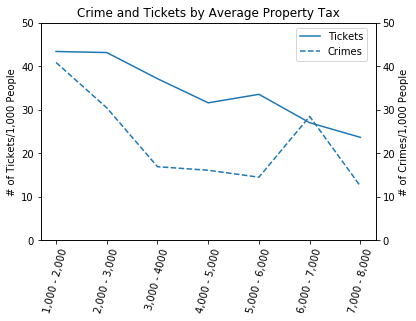

In [11]:




taxtick3 = taxtick.groupby('Property Tax on Housting ($)').sum()
bins1 = pd.cut(taxtick3.index, np.linspace(1000, 8000, 8))
taxtick3 = taxtick3.groupby(bins1).sum()
taxtick3['Tickets per 1000 people'] = taxtick3['# of Tickets']/(taxtick3['Estimated zip code population in 2016']/1000)
taxtick3['Crimes per 1000 people'] = taxtick3['Total Crimes']/(taxtick3['Estimated zip code population in 2016']/1000)
taxtick3

a = taxtick3['Tickets per 1000 people'].plot(label = 'Tickets', title='Crime and Tickets by Average Property Tax', rot = 75)
plt.ylabel('# of Tickets/1,000 People'), plt.ylim(bottom=0, top=50)

b = taxtick3['Crimes per 1000 people'].plot( linestyle = '--', ax=plt.twinx(), label = 'Crimes')
plt.ylabel('# of Crimes/1,000 People'), plt.legend(), plt.ylim(bottom=0, top=50)

lines, labels = a.get_legend_handles_labels()
lines2, labels2 = b.get_legend_handles_labels()
b.legend(lines + lines2, labels + labels2, bbox_to_anchor=(.99, 1))
b.set_xticklabels([x for x in ['0-1,000','1,000 - 2,000', '2,000 - 3,000', '3,000 - 4000', '4,000 - 5,000', '5,000 - 6,000', '6,000 - 7,000', '7,000 - 8,000']], rotation = 180)



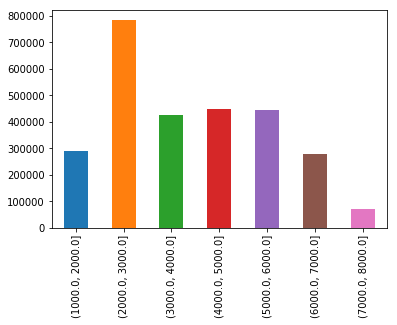

In [12]:
taxtick3['Estimated zip code population in 2016'].plot(kind='bar')

[Text(0,0,'0'),
 Text(0,0,'10'),
 Text(0,0,'20'),
 Text(0,0,'30'),
 Text(0,0,'40'),
 Text(0,0,'50')]

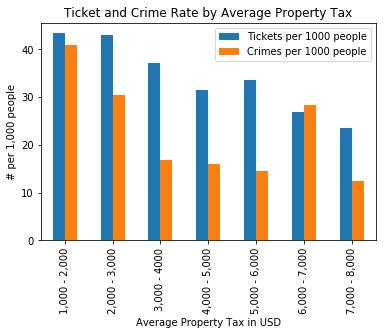

In [13]:
taxtick4 = taxtick3.reset_index()
taxtick4.rename(columns={'index': 'Average Property Tax'}, inplace = True)
b = taxtick4.plot(kind = 'bar', x='Average Property Tax', y=['Tickets per 1000 people', 'Crimes per 1000 people'])
plt.xlabel("Average Property Tax in USD"), plt.ylabel('# per 1,000 people'), plt.title("Ticket and Crime Rate by Average Property Tax")

b.set_xticklabels([x for x in ['1,000 - 2,000', '2,000 - 3,000', '3,000 - 4000', '4,000 - 5,000', '5,000 - 6,000', '6,000 - 7,000', '7,000 - 8,000']])

b.set_yticklabels(['{:,.0f}'.format(x) for x in b.get_yticks()])

<Figure size 432x288 with 0 Axes>

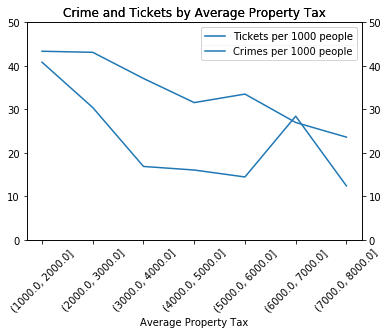

In [14]:
plt.figure()
a = taxtick4.plot(x='Average Property Tax', 
                  xticks =([x for x in [0,1,2,3,4,5,6,7]]), 
                  y = 'Tickets per 1000 people', rot = 45, 
              title = 'Crime and Tickets by Average Property Tax', ylim = (0,50))
b = taxtick4.plot(x='Average Property Tax', y = 'Crimes per 1000 people', ax = plt.twinx(), rot = 45, 
             title = 'Crime and Tickets by Average Property Tax', ylim = (0,50))
lines, labels = a.get_legend_handles_labels()
lines2, labels2 = b.get_legend_handles_labels()
b.legend(lines + lines2, labels + labels2, loc=0)

[Text(0,0,'1,000 - 2,000'),
 Text(0,0,'2,000 - 3,000'),
 Text(0,0,'3,000 - 4000'),
 Text(0,0,'4,000 - 5,000'),
 Text(0,0,'5,000 - 6,000'),
 Text(0,0,'6,000 - 7,000'),
 Text(0,0,'7,000 - 8,000')]

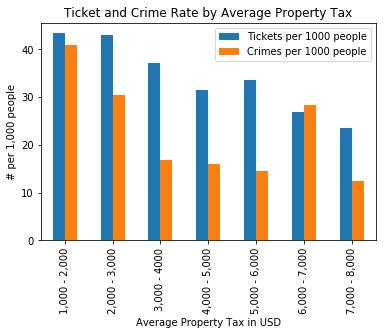

In [15]:
taxtick4 = taxtick3.reset_index()
taxtick4.rename(columns={'index': 'Average Property Tax'}, inplace = True)
b = taxtick4.plot(kind = 'bar', x='Average Property Tax', y=['Tickets per 1000 people', 'Crimes per 1000 people'])
plt.xlabel("Average Property Tax in USD"), plt.ylabel('# per 1,000 people'), plt.title("Ticket and Crime Rate by Average Property Tax")

b.set_xticklabels([x for x in ['1,000 - 2,000', '2,000 - 3,000', '3,000 - 4000', '4,000 - 5,000', '5,000 - 6,000', '6,000 - 7,000', '7,000 - 8,000']])


In [16]:
taxtick4[['Average Property Tax','Tickets per 1000 people', 'Crimes per 1000 people']]

,Average Property Tax,Tickets per 1000 people,Crimes per 1000 people
0,"(1000.0, 2000.0]",43.371908,40.846095
1,"(2000.0, 3000.0]",43.126481,30.420017
2,"(3000.0, 4000.0]",37.111786,16.879938
3,"(4000.0, 5000.0]",31.565778,16.061036
4,"(5000.0, 6000.0]",33.521249,14.463586
5,"(6000.0, 7000.0]",26.990325,28.441689
6,"(7000.0, 8000.0]",23.623937,12.412099
